<a href="https://colab.research.google.com/github/weeblord2030/AI-ML-emperiments/blob/main/Simpile_Neural_network_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
np.random.seed(123)

% matplotlib inline

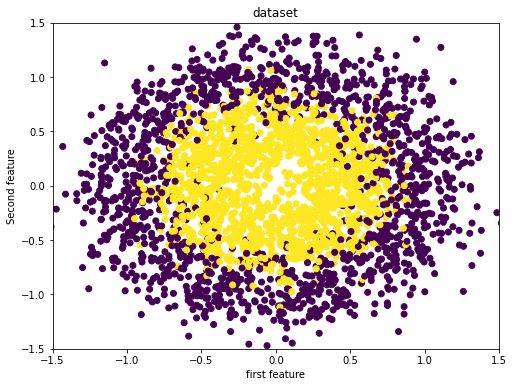

In [3]:
X, y = make_circles(n_samples=3000, factor=0.5, noise=.2)

fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1], c =y)
plt.xlim([-1.5,1.5])
plt.ylim([-1.5,1.5])
plt.title('dataset')
plt.xlabel('first feature')
plt.ylabel('Second feature')
plt.show()


In [8]:
y_true = y[:, np.newaxis]
# Split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y_true)

print(f'Shape X_train: {X_train.shape}')
print(f'Shape y_train: {y_train.shape}')
print(f'Shape X_test: {X_test.shape}')
print(f'Shape y_test: {y_test.shape}')

Shape X_train: (2250, 2)
Shape y_train: (2250, 1)
Shape X_test: (750, 2)
Shape y_test: (750, 1)


In [31]:
class NeuralNet():

  def __init__(self, n_inputs, n_hidden, n_outputs):
    self.n_inputs = n_inputs
    self.n_outputs = n_outputs
    self.hidden = n_hidden 

    # Initialize weight matrices and bias vectors
    self.W_h = np.random.randn(self.n_inputs, self.hidden)
    self.b_h = np.zeros((1, self.hidden))
    self.W_o = np.random.randn(self.hidden, self.n_outputs)
    self.b_o = np.zeros((1, self.n_outputs))

  def sigmoid(self, a):
      return 1 / (1 + np.exp(-a))
  def forward_pass(self, X):

      """
      Propagates the given input X forward through the net.

      Returns:
          A_h: matrix with activations of all hidden neurons for all input examples
          O_h: matrix with outputs of all hidden neurons for all input examples
          A_o: matrix with activations of all output neurons for all input examples
          O_o: matrix with outputs of all output neurons for all input examples
      """
      # Compute activations and outputs of hidden units
      A_h = np.dot(X, self.W_h) + self.b_h
      O_h = np.tanh(A_h)

      # Compute activations and outputs of output units
      A_o = np.dot(O_h, self.W_o) + self.b_o
      O_o = self.sigmoid(A_o)

      outputs = {
              "A_h": A_h,
              "A_o": A_o,
              "O_h": O_h,
              "O_o": O_o,
              }

      return outputs

  def cost(self, y_true, y_predict, n_samples):
      """
      Computes and returns the cost over all examples
      """
      # same cost function as in logistic regression
      cost = (- 1 / n_samples) * np.sum(y_true * np.log(y_predict) + (1 - y_true) * (np.log(1 - y_predict)))
      cost = np.squeeze(cost)
      assert isinstance(cost, float)

      return cost

  def backward_pass(self,  X, Y, n_samples, outputs):
      """
      Propagates the errors backward through the net.

      Returns:
          dW_h: partial derivatives of loss function w.r.t hidden weights
          db_h: partial derivatives of loss function w.r.t hidden bias
          dW_o: partial derivatives of loss function w.r.t output weights
          db_o: partial derivatives of loss function w.r.t output bias
      """

      dA_o = (outputs["O_o"] - Y)
      dW_o = (1 / n_samples) * np.dot(outputs["O_h"].T, dA_o)
      db_o = (1 / n_samples) * np.sum(dA_o)

      dA_h = (np.dot(dA_o, self.W_o.T)) * (1 - np.power(outputs["O_h"], 2))
      dW_h = (1 / n_samples) * np.dot(X.T, dA_h)
      db_h = (1 / n_samples) * np.sum(dA_h)

      gradients = {
              "dW_o": dW_o,
              "db_o": db_o,
              "dW_h": dW_h,
              "db_h": db_h,
              }

      return gradients

  def update_weights(self, gradients, eta):
      """
      Updates the model parameters using a fixed learning rate
      """
      self.W_o = self.W_o - eta * gradients["dW_o"]
      self.W_h = self.W_h - eta * gradients["dW_h"]
      self.b_o = self.b_o - eta * gradients["db_o"]
      self.b_h = self.b_h - eta * gradients["db_h"]

  def train(self, X, y, n_iters=500, eta=0.3):
      """
      Trains the neural net on the given input data
      """
      n_samples, _ = X.shape

      for i in range(n_iters):
          outputs = self.forward_pass(X)
          cost = self.cost(y, outputs["O_o"], n_samples=n_samples)
          gradients = self.backward_pass(X, y, n_samples, outputs)

          if i % 100 == 0:
              print(f'Cost at iteration {i}: {np.round(cost, 4)}')

          self.update_weights(gradients, eta)


  def predict(self, X):
      """
      Computes and returns network predictions for given dataset
      """
      outputs = self.forward_pass(X)
      y_pred = [1 if elem >= 0.5 else 0 for elem in outputs["O_o"]]

      return np.array(y_pred)[:, np.newaxis]


In [32]:
nn = NeuralNet(2, 6,1)


In [33]:
print("Shape of weight matrices and bias vectors:")
print(f'W_h shape: {nn.W_h.shape}')
print(f'b_h shape: {nn.b_h.shape}')
print(f'W_o shape: {nn.W_o.shape}')
print(f'b_o shape: {nn.b_o.shape}')
print()


Shape of weight matrices and bias vectors:
W_h shape: (2, 6)
b_h shape: (1, 6)
W_o shape: (6, 1)
b_o shape: (1, 1)



In [34]:
nn.train(X_train, y_train, n_iters=5000, eta=0.7)

Cost at iteration 0: 0.8072
Cost at iteration 100: 0.424
Cost at iteration 200: 0.3231
Cost at iteration 300: 0.3011
Cost at iteration 400: 0.2915
Cost at iteration 500: 0.2855
Cost at iteration 600: 0.281
Cost at iteration 700: 0.2775
Cost at iteration 800: 0.2747
Cost at iteration 900: 0.3058
Cost at iteration 1000: 0.3072
Cost at iteration 1100: 0.3073
Cost at iteration 1200: 0.3072
Cost at iteration 1300: 0.3071
Cost at iteration 1400: 0.307
Cost at iteration 1500: 0.3069
Cost at iteration 1600: 0.3067
Cost at iteration 1700: 0.3066
Cost at iteration 1800: 0.3064
Cost at iteration 1900: 0.3062
Cost at iteration 2000: 0.306
Cost at iteration 2100: 0.3058
Cost at iteration 2200: 0.3056
Cost at iteration 2300: 0.3055
Cost at iteration 2400: 0.3054
Cost at iteration 2500: 0.3053
Cost at iteration 2600: 0.3051
Cost at iteration 2700: 0.305
Cost at iteration 2800: 0.3049
Cost at iteration 2900: 0.3048
Cost at iteration 3000: 0.3047
Cost at iteration 3100: 0.3045
Cost at iteration 3200: 0

In [35]:
n_test_samples, _ = X_test.shape
y_predict = nn.predict(X_test)
print(f"Classification accuracy on test set: {(np.sum(y_predict == y_test)/n_test_samples)*100} %")

Classification accuracy on test set: 86.0 %


In [36]:
X_temp, y_temp = make_circles(n_samples=60000, noise=.5)
y_predict_temp = nn.predict(X_temp)
y_predict_temp = np.ravel(y_predict_temp)

Text(0.5, 1.0, 'Decision boundary')

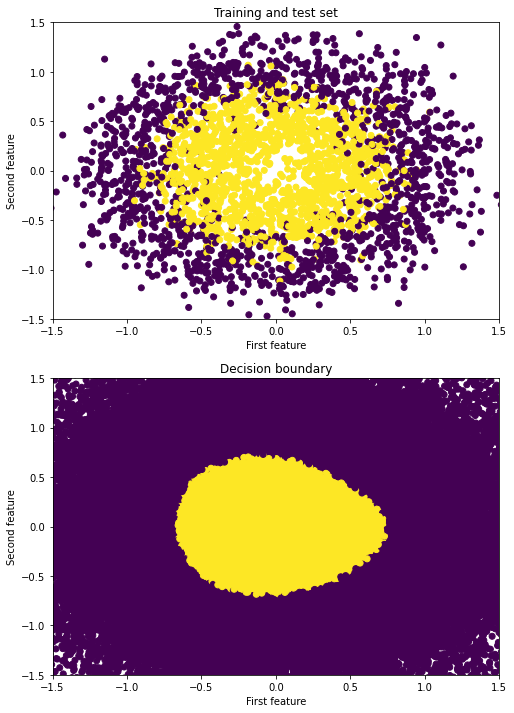

In [37]:
fig = plt.figure(figsize=(8,12))
ax = fig.add_subplot(2,1,1)
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.title("Training and test set")

ax = fig.add_subplot(2,1,2)
plt.scatter(X_temp[:,0], X_temp[:,1], c=y_predict_temp)
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.title("Decision boundary")